# Module 07: Data Preprocessing and Feature Engineering

This notebook supports **Module 07** and contains all code and explanatory text for:

- **Part 1**: Missing values, encoding categorical variables, scaling/normalization
- **Part 2**: Outlier detection, feature transformation, domain-driven features,
  preprocessing pipelines, and a quick sanity-check model

Datasets used:
- **Titanic dataset** (from Kaggle) – for demonstrating missing values
- **Heart Failure / Heart Disease dataset** – for the main preprocessing pipeline

Please upload or mount the CSV files in your environment as needed.

---
## Part 1: Core Preprocessing Concepts

In Part 1 we cover:
- Why preprocessing is needed
- How to handle missing values
- How to encode categorical variables
- How to scale / normalize numeric features

###Handling Missing Values (Titanic Dataset)

Real-life analogy: **attendance sheet with blank cells**.

- Some students have `P` (present), some have `A` (absent), and some cells are blank.
- If we ignore those blanks, the final attendance calculation will be wrong.
- We must decide how to handle the blanks using logic.

In the Titanic dataset:
- `Age` has missing values (numeric)
- `Embarked` has a few missing values (categorical)
- `Cabin` has many missing values (often dropped in simple demos)

We will:
1. Inspect missing values
2. Fill numeric column (`Age`) with the **median**
3. Fill categorical column (`Embarked`) with the **mode**
4. Drop `Cabin` because it is mostly missing

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd

# Load Titanic dataset
# NOTE: Make sure titanic.csv exists at this path or update the path accordingly.
# You can download from here.  https://www.kaggle.com/datasets/yasserh/titanic-dataset
titanic_path = "/content/drive/MyDrive/Colab Notebooks/Phitron  AI ML/Machine Learning/Week 2/Module-7/Titanic-Dataset.csv"  # change if needed
df_titanic = pd.read_csv(titanic_path)

print("First 10 rows of Titanic dataset:")
df_titanic.head(10)

First 10 rows of Titanic dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
df_titanic.shape

(891, 12)

In [8]:
print("Unique values per column:")
df_titanic.nunique()

Unique values per column:


,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [9]:
print("Missing values per column:")
df_titanic.isnull().sum()

Missing values per column:


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Distribution of Age Column:


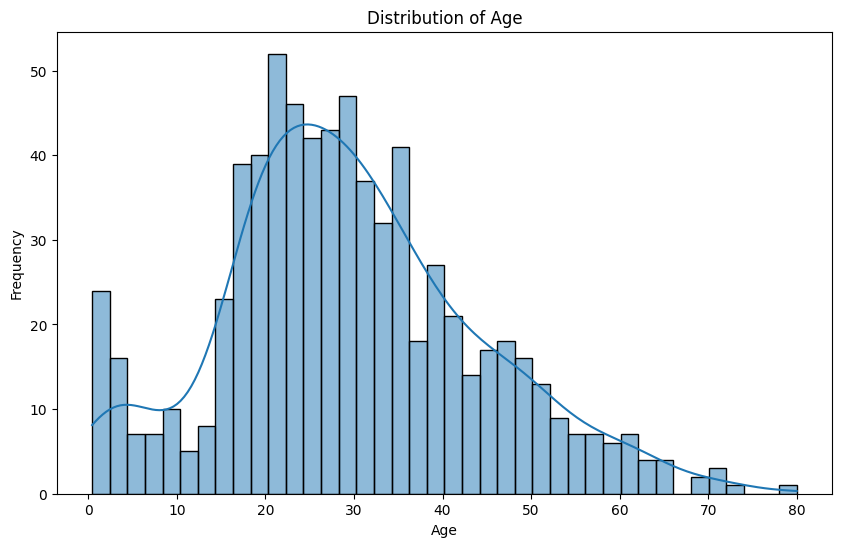

In [10]:
print("Distribution of Age Column:")
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df_titanic['Age'],kde=True,bins=40)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#We will use Median as the feature values are right skewed

Distribution of Embarked Column:


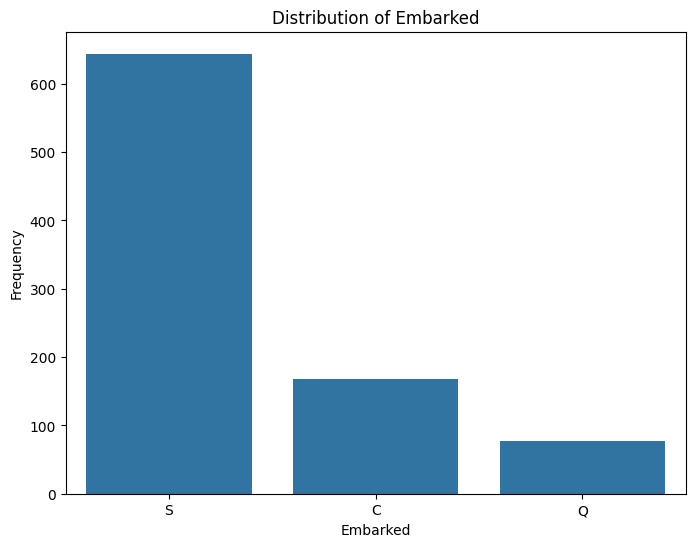

In [11]:
print("Distribution of Embarked Column:")

plt.figure(figsize=(8, 6))
sns.countplot(data=df_titanic,x='Embarked')
plt.title('Distribution of Embarked')
plt.xlabel('Embarked')
plt.ylabel('Frequency')
plt.show()
#We will use Mode

In [12]:
# 1. Handle numeric missing values: Age

age_mdn=df_titanic['Age'].median()
df_titanic['Age'].fillna(age_mdn,inplace=True)
# 2. Handle categorical missing values: Embarked
embarked_md=df_titanic['Embarked'].mode()[0]
df_titanic['Embarked'].fillna(embarked_md,inplace=True)
# 3. Drop Cabin (too many missing values)
df_titanic=df_titanic.drop(columns=['Cabin'])

/tmp/ipython-input-3425549951.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic['Age'].fillna(age_mdn,inplace=True)
/tmp/ipython-input-3425549951.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [13]:
print("Missing values after handling:")
df_titanic.isnull().sum()

Missing values after handling:


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


###Encoding Categorical Variables (Heart Dataset)

Real-life analogy: **canteen token system**.

- The canteen menu has items like *Tehari*, *Chowmein*, *Biriyani*.
- The billing machine cannot understand these strings; it needs numeric codes.
- However, assigning `Tehari = 1`, `Chowmein = 2`, `Biriyani = 3` does **not**
  mean Biriyani is greater than Tehari. The numbers are **labels, not ranks**.

In the Heart dataset, we will:
- Use **Label Encoding** for binary categories like `Sex` and `ExerciseAngina`
- Use **OneHot Encoding** for nominal categories like `ChestPainType`,
  `RestingECG`, and `ST_Slope`

In [14]:
from sklearn.preprocessing import LabelEncoder
# Load Heart dataset
heart_path = "/content/drive/MyDrive/Colab Notebooks/Phitron  AI ML/Machine Learning/Week 2/Module-7/heart.csv"  # change if needed
df_heart = pd.read_csv(heart_path)

print("First 10 rows of Heart dataset:")
display(df_heart.head(10))

print("\nColumn data types:")
display(df_heart.dtypes)


First 10 rows of Heart dataset:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0



Column data types:


,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


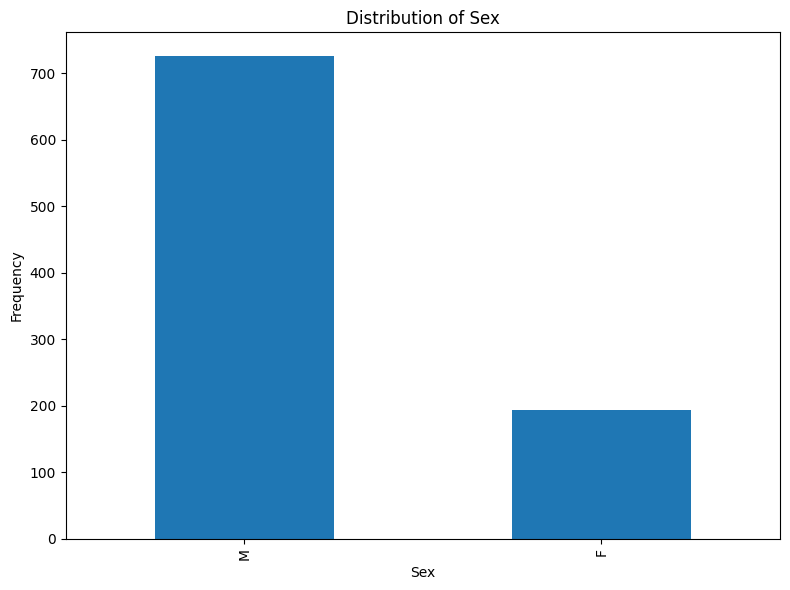

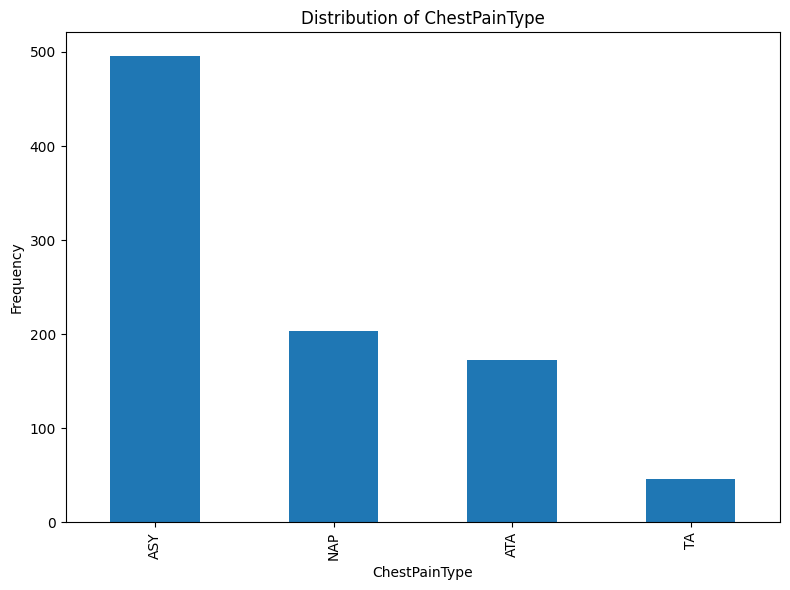

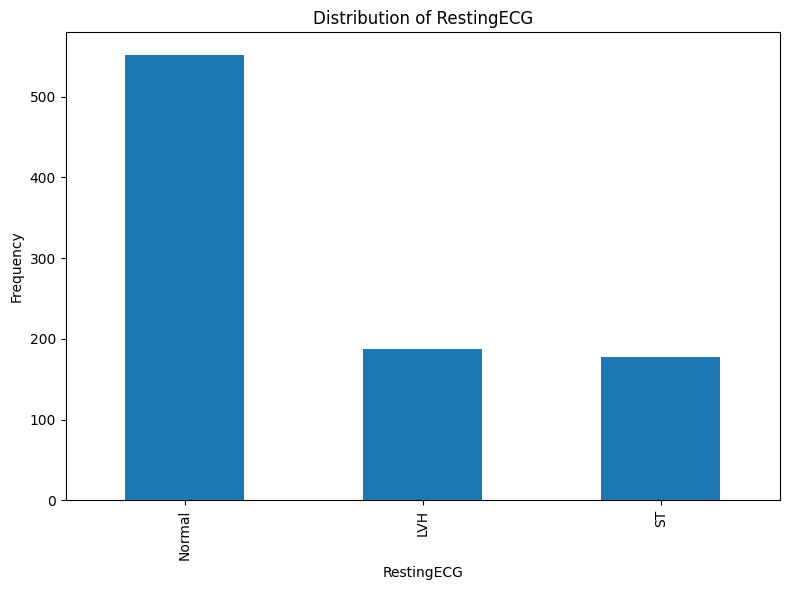

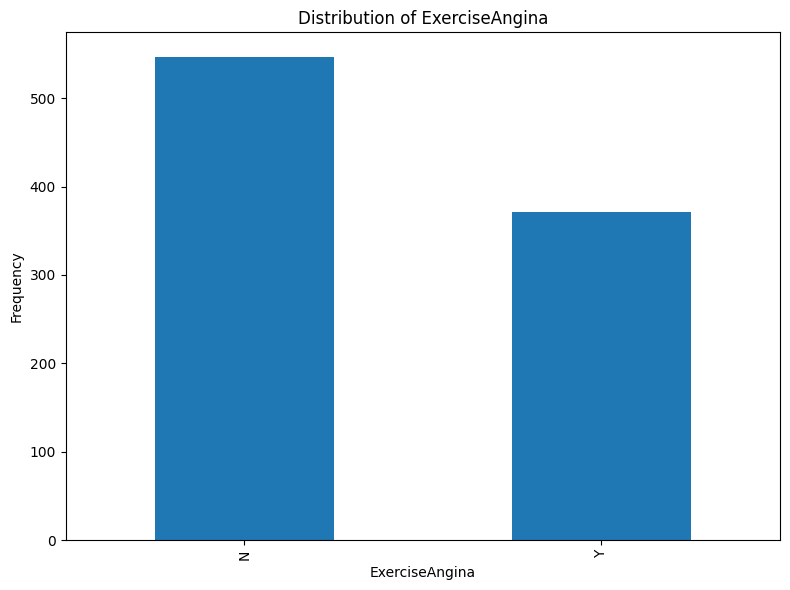

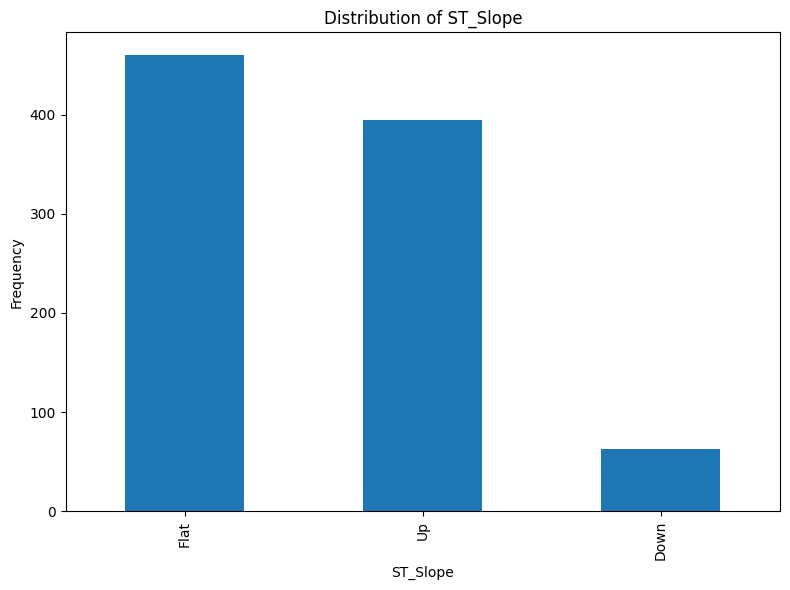

In [15]:
#Categorical Feature Exploration
categorical_cols=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
for col in categorical_cols:
  plt.figure(figsize=(8, 6))
  df_heart[col].value_counts().plot(kind='bar')
  plt.title(f'Distribution of {col}')
  plt.ylabel('Frequency')
  plt.tight_layout()
  plt.show()

In [16]:
# Label Encoding for binary categorical columns -> Sex and ExerciseAngina
le=LabelEncoder()
df_heart['Sex']=le.fit_transform(df_heart['Sex'])
df_heart['ExerciseAngina']=le.fit_transform(df_heart['ExerciseAngina'])

In [17]:
df_heart.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,0,0.0,Up,0
5,39,1,NAP,120,339,0,Normal,170,0,0.0,Up,0
6,45,0,ATA,130,237,0,Normal,170,0,0.0,Up,0
7,54,1,ATA,110,208,0,Normal,142,0,0.0,Up,0
8,37,1,ASY,140,207,0,Normal,130,1,1.5,Flat,1
9,48,0,ATA,120,284,0,Normal,120,0,0.0,Up,0


In [18]:
# OneHot Encoding for nominal categorical columns
cat_cols=['ChestPainType','RestingECG','ST_Slope']
df_heart_encoded=pd.get_dummies(
    df_heart,
    columns=cat_cols,
    dtype=int
)


In [19]:
df_heart_encoded.head(10)

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1.0,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0.0,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1.5,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,0,1,0,0,1,0,0,0,1
5,39,1,120,339,0,170,0,0.0,0,0,0,1,0,0,1,0,0,0,1
6,45,0,130,237,0,170,0,0.0,0,0,1,0,0,0,1,0,0,0,1
7,54,1,110,208,0,142,0,0.0,0,0,1,0,0,0,1,0,0,0,1
8,37,1,140,207,0,130,1,1.5,1,1,0,0,0,0,1,0,0,1,0
9,48,0,120,284,0,120,0,0.0,0,0,1,0,0,0,1,0,0,0,1


###Normalization and Scaling

Real-life analogy: **comparing salary and height**.

- Height might range from 150 to 190 cm.
- Salary might range from 20,000 to 700,000.
- If we feed these two features directly into a distance-based model,
  salary will dominate the calculation.

To fix this, we **scale** numeric features so they are on a comparable range.

Common approaches:
- **StandardScaler**: transforms features to have mean 0 and standard deviation 1
- **MinMaxScaler**: rescales features to a fixed range, usually [0, 1]

Always fit the scaler on the **training set only**, then transform both
training and test sets using the same scaler.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Assume df_heart_encoded is our working dataframe with target 'HeartDisease'

target_col='HeartDisease'
x=df_heart_encoded.drop(columns=[target_col])
y=df_heart_encoded[target_col]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
# Standard Scaling
scaler_std=StandardScaler()
x_train_std=scaler_std.fit_transform(x_train)
x_test_std=scaler_std.fit_transform(x_test)
#mean and SD will be calcualted from X_train


# MinMax Scaling

scaler_minmax=MinMaxScaler()
x_train_minmax=scaler_minmax.fit_transform(x_train)
x_test_minmax=scaler_minmax.fit_transform(x_test)
#min and max will be calcualted from X_train


print("\n--- Displaying Standard Scaled Data ---")
# Convert scaled arrays back to DataFrame for better visualization with column names
x_train_sd_df=pd.DataFrame(x_train_std,columns=x_train.columns,index=x_train.index)
x_test_sd_df=pd.DataFrame(x_test_std,columns=x_test.columns,index=x_test.index)
print("\nFirst 5 rows of X_train & X_test (Standard Scaled):")

display(x_train_sd_df.head())
display(x_test_sd_df.head())
print("\n--- Displaying Standard Scaled Data ---")
# Convert scaled arrays back to DataFrame for better visualization with column names
x_train_minmax_df=pd.DataFrame(x_train_minmax,columns=x_train.columns,index=x_train.index)
x_test_minmax_df=pd.DataFrame(x_test_minmax,columns=x_test.columns,index=x_test.index)

print("\nFirst 5 rows of X_train (Minmax Scaled):")
display(x_train_minmax_df.head())
display(x_test_minmax_df.head())


--- Displaying Standard Scaled Data ---

First 5 rows of X_train & X_test (Standard Scaled):


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
155,0.239292,0.537019,1.183802,1.307314,1.877849,0.551672,1.182037,1.900458,0.905597,-0.480384,-0.530275,-0.213524,-0.505445,0.816002,-0.494088,-0.254981,0.962897,-0.851064
362,0.239292,0.537019,1.183802,-1.878000,-0.532524,-1.486343,-0.845997,-0.834739,-1.104244,-0.480384,1.885813,-0.213524,-0.505445,-1.225487,2.023931,-0.254981,0.962897,-0.851064
869,0.558968,0.537019,0.913811,0.096522,1.877849,0.831400,-0.845997,0.624033,-1.104244,-0.480384,1.885813,-0.213524,-0.505445,0.816002,-0.494088,-0.254981,-1.038533,1.174999
101,-0.293501,0.537019,-0.166155,-0.210833,-0.532524,-1.446382,-0.845997,-0.834739,0.905597,-0.480384,-0.530275,-0.213524,-0.505445,0.816002,-0.494088,-0.254981,-1.038533,1.174999
199,0.345851,-1.862131,-0.166155,0.990645,-0.532524,-1.526304,-0.845997,0.076994,-1.104244,-0.480384,-0.530275,4.683304,-0.505445,0.816002,-0.494088,-0.254981,0.962897,-0.851064


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
668,1.073509,-2.213015,0.526481,0.040912,-0.607493,1.517878,-0.758513,-0.833872,-1.026436,2.056033,-0.540495,-0.273434,-0.513553,0.809121,-0.479527,-0.316983,-0.900568,1.081578
30,0.022841,0.451872,0.799577,2.860381,-0.607493,-0.325295,-0.758513,-0.833872,-1.026436,-0.486373,1.850156,-0.273434,-0.513553,0.809121,-0.479527,-0.316983,1.110410,-0.924575
377,1.283643,0.451872,1.618865,-1.661244,1.646110,-0.626221,-0.758513,0.412196,0.974245,-0.486373,-0.540495,-0.273434,-0.513553,-1.235910,2.085387,-0.316983,1.110410,-0.924575
535,0.338041,0.451872,-0.019710,-1.661244,-0.607493,-0.626221,1.318368,0.204518,0.974245,-0.486373,-0.540495,-0.273434,1.947220,-1.235910,-0.479527,-0.316983,1.110410,-0.924575
807,0.127907,0.451872,-1.221332,1.036019,-0.607493,0.652715,-0.758513,-0.833872,-1.026436,2.056033,-0.540495,-0.273434,-0.513553,0.809121,-0.479527,-0.316983,-0.900568,1.081578



--- Displaying Standard Scaled Data ---

First 5 rows of X_train (Minmax Scaled):


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
155,0.562500,1.0,0.775,0.567164,1.0,0.674419,1.0,0.636364,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
362,0.562500,1.0,0.775,0.000000,0.0,0.279070,0.0,0.295455,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
869,0.625000,1.0,0.750,0.351575,1.0,0.728682,0.0,0.477273,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
101,0.458333,1.0,0.650,0.296849,0.0,0.286822,0.0,0.295455,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
199,0.583333,0.0,0.650,0.510779,0.0,0.271318,0.0,0.409091,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
668,0.729167,0.0,0.500000,0.345745,0.0,0.838028,0.0,0.215686,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
30,0.520833,1.0,0.541667,0.918440,0.0,0.492958,0.0,0.215686,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
377,0.770833,1.0,0.666667,0.000000,1.0,0.436620,0.0,0.450980,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
535,0.583333,1.0,0.416667,0.000000,0.0,0.436620,1.0,0.411765,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
807,0.541667,1.0,0.233333,0.547872,0.0,0.676056,0.0,0.215686,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
